ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

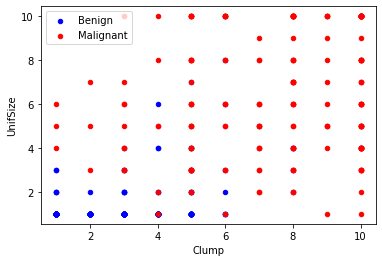

In [1]:
# SVM_Cells_Demo
# Referenced from : https://www.youtube.com/watch?v=7sz4WpkUIIs
# Data from : https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqbjJPXzlYSjZYWk9kSEJ4SVhjY21jcEtKV2xEd3xBQ3Jtc0tuLXJPX2UtWGREaVlkZlpBWm1TTWJsWWVpMk14MHl3am5ydlVLSHNLbG1FbUI5YUJCZ3haTmVjSWlPZnlSRTdVYy01NkZ4WkFWS1FVNVVQc1ZiYkhIemlHWHlCdFdqZmUxME1WbVY4U2VPVE1CWVlZZw&q=https%3A%2F%2Fs3-api.us-geo.objectstorage.softlayer.net%2Fcf-courses-data%2FCognitiveClass%2FML0101ENv3%2Flabs%2Fcell_samples.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cell_df = pd.read_csv("cell_samples.csv")



# creating variables that store records that are classified as malignant (Class value of 4) and benign (class value of 2) respecitvely
malignant_df = cell_df[cell_df['Class'] == 4][0:200]
benign_df = cell_df[cell_df['Class'] == 2][0:200]


#plotting both benign and malignant data onto the same graph, as a scatterplot with Clump in the x axis and UnifSize as the y
axes = benign_df.plot(kind='scatter', x='Clump', y='UnifSize', color='blue', label='Benign')
malignant_df.plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='Malignant',ax=axes)


# help(benign_df.plot)

#now to start removing unnecessary rows from the data, that will not be used in the SVM
cell_df.dtypes

cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes



In [2]:
# now to start removing unnecessary columns from the data
cell_df.columns

feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

# we have removed class and id columns from cell_df, going from 11 columns to 9 columns

# independent variable
X = np.asarray(feature_df)

# dependent variable

y = np.asarray(cell_df['Class'])

y[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

In [3]:
# now to start dividing the data into train and test using the data
# Train(X,y) where X itself is a 2D array and y is 1D array
# Test(X,y)
# We will use 80 rows for training and 20 rows for testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# 546 rows x 9 columns
X_train.shape

# 546 rows x 1 column
y_train.shape

# 137 rows x 9 columns
X_test.shape

# 137 rows x 9 columns
y_test.shape


(137,)

In [4]:
from sklearn import svm

classifier = svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)


In [6]:
# now to output the results of the prediction to determine the accuracy of SVM

from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

